<a href="https://colab.research.google.com/github/ac-26/CSI-25/blob/main/week5_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 5 Assignment-> Data Preprocessing and feature engineering**

## **By -> Arnav Chopra**

In [604]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [605]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [606]:
train_url = "https://raw.githubusercontent.com/ac-26/CSI-25/refs/heads/main/house-prices-advanced-regression-techniques/train.csv"
test_url = "https://raw.githubusercontent.com/ac-26/CSI-25/refs/heads/main/house-prices-advanced-regression-techniques/test.csv"

In [607]:
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

## **Exploring the dataset**

In [608]:
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [609]:
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [610]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [611]:
train_df.isnull().sum()[train_df.isnull().sum() > 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


### **Understanding target column**

In [612]:
train_df['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


### **As, mean > median, i suspect that the data is skewed i will check by plotting curves**

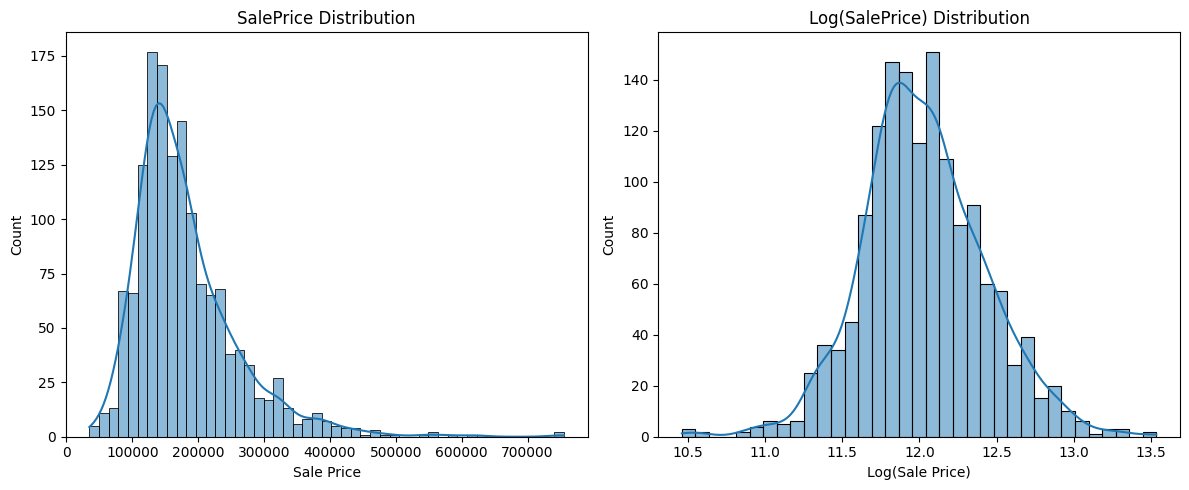

In [613]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#original distribution
sns.histplot(train_df['SalePrice'], kde=True, ax=axes[0])
axes[0].set_title('SalePrice Distribution')
axes[0].set_xlabel('Sale Price')

#log transformed distribution
sns.histplot(np.log1p(train_df['SalePrice']), kde=True, ax=axes[1])
axes[1].set_title('Log(SalePrice) Distribution')
axes[1].set_xlabel('Log(Sale Price)')


plt.tight_layout()
plt.show()
#suspicion confirmed, data is heavily right skewed, we will likely use log transofrmation
#as many algorithms assume the data to be normally distributed

### **Checking for outliers**

In [614]:
Q1 = train_df['SalePrice'].quantile(0.25)
Q3 = train_df['SalePrice'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound:,.0f}")
print(f"Upper bound: {upper_bound:,.0f}")
print(f"\nHouses above upper bound: {(train_df['SalePrice'] > upper_bound).sum()}")
print(f"Houses below lower bound: {(train_df['SalePrice'] < lower_bound).sum()}")
#this seems fair as these can be some expensive houses, lets just check with size to be sure

Lower bound: 3,938
Upper bound: 340,038

Houses above upper bound: 61
Houses below lower bound: 0


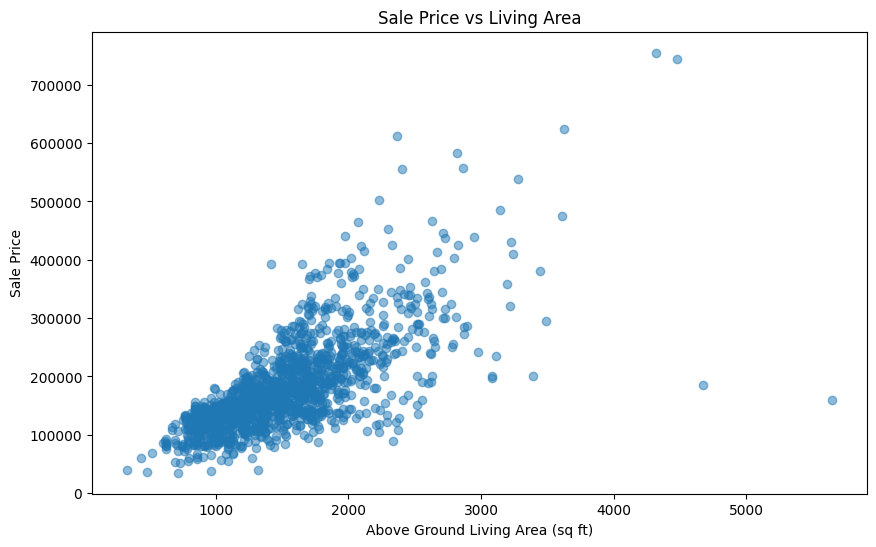

In [615]:
#relationship between living area and price
plt.figure(figsize=(10, 6))
plt.scatter(train_df['GrLivArea'], train_df['SalePrice'], alpha=0.5)
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Living Area')
plt.show()

In [616]:
large_cheap = train_df[(train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 300000)]
print("Possible ANomilies\n")
print(large_cheap[['GrLivArea', 'SalePrice', 'OverallQual', 'YearBuilt']])

Possible ANomilies

      GrLivArea  SalePrice  OverallQual  YearBuilt
523        4676     184750           10       2007
1298       5642     160000           10       2008


### **Here, i see there are 2 houeses around 4000+ sq ft with prices under $200000 (bottom right), these are potential anomilies and we will remove them**

## **Starting with Data Preprocessing**

In [617]:
missing_summary = pd.DataFrame({
    'Missing_Count': train_df.isnull().sum(),
    'Percentage': (train_df.isnull().sum() / len(train_df)) * 100
})

In [618]:
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

In [619]:
missing_summary

,Missing_Count,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


### **According to our documentation given, all these values not necessarilyy mean null, there are various columns where there are missing values that mean "None/Not Applicable" and they need not be imputed**

In [620]:
train_processed = train_df.copy()

#hndle none type missing values
none_features = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                 'MasVnrType']

for feature in none_features:
    train_processed[feature].fillna('None', inplace=True)

In [621]:
print("Remaining missing values:")
print(train_processed.isnull().sum()[train_processed.isnull().sum() > 0])

Remaining missing values:
LotFrontage    259
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64


In [622]:
#now we fill values where both shuould be null according to their dependency
train_processed['GarageYrBlt'].fillna(0, inplace=True)
train_processed['MasVnrArea'].fillna(0, inplace=True)
train_processed['Electrical'].fillna(train_processed['Electrical'].mode()[0], inplace=True)

print("\nAfter filling, remaining missing values:")
print(train_processed.isnull().sum()[train_processed.isnull().sum() > 0])


After filling, remaining missing values:
LotFrontage    259
dtype: int64


In [623]:
#now only LotFrontage is left, that we will need to analyse a little more for it
#houses in same neighbourhood likely have same lot sizes hence i will impute LotFrontage by neighborhood median

train_processed['LotFrontage'] = train_processed.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

In [624]:
#check if all missing values are handled
train_processed.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
Alley,0
LotShape,0
LandContour,0
Utilities,0


### **Removing those outliers that we identified earlier**

In [625]:
outlier_indices = [523, 1298]
train_processed = train_processed.drop(outlier_indices)

### **Checking data types for encoding**

In [626]:
train_processed.dtypes.value_counts()

,count
object,43
int64,35
float64,3


### **Checking cardinality of categorical columns to know if they need special handlinf for encoding**

In [627]:
def check_cardinalty():

  categorical_cols = train_processed.select_dtypes(include=['object']).columns

  for col in categorical_cols:
      print(f"{col}: {train_processed[col].nunique()} unique values")

### **As there are alot of categorical columns i will first try to reduce these into more quality features**

### **Feature Engineering to improve features**

In [628]:
#total area in sqft
train_processed['TotalSF'] = train_processed['TotalBsmtSF'] + train_processed['1stFlrSF'] + train_processed['2ndFlrSF']

In [629]:
#total bathrooms, here notice that it is given as half bath so we take 0.5 for better understanding and avoid bias
train_processed['TotalBathrooms'] = (train_processed['FullBath'] + train_processed['BsmtFullBath'] + 0.5 * train_processed['HalfBath'] + 0.5 * train_processed['BsmtHalfBath'])

In [630]:
#porch area total
train_processed['TotalPorchSF'] = (train_processed['OpenPorchSF'] + train_processed['3SsnPorch'] + train_processed['EnclosedPorch'] + train_processed['ScreenPorch'] + train_processed['WoodDeckSF'])

In [631]:
#converting these to binary as quantity here dont really matter to us for example
#just knowing that a property has something like pool will increase its price and not how large the pool is, same goes for other also
train_processed['HasPool'] = (train_processed['PoolArea'] > 0).astype(int)
train_processed['HasGarage'] = (train_processed['GarageArea'] > 0).astype(int)
train_processed['HasBasement'] = (train_processed['TotalBsmtSF'] > 0).astype(int)
train_processed['HasFireplace'] = (train_processed['Fireplaces'] > 0).astype(int)

### **Here i also observe that there are many ordinal columns for eg ExterQual, we can encode these columns using ordinal encoder**

In [632]:
ordinal_features = {
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['None', 'No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2': ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'FireplaceQu': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageFinish': ['None', 'Unf', 'RFn', 'Fin'],
    'GarageQual': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'PoolQC': ['None', 'Fa', 'TA', 'Gd', 'Ex'],
    'Fence': ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
}

### **As so many columns are there we will store the encoders for each column so that we dont face any issue in the future**

In [633]:
ordinal_encoders = {}
binary_encoders = {}

In [634]:
from sklearn.preprocessing import OrdinalEncoder

for feature, order in ordinal_features.items():
    ordinal_encoders[feature] = OrdinalEncoder(categories=[order])
    train_processed[feature] = ordinal_encoders[feature].fit_transform(train_processed[[feature]]).ravel()

In [635]:
#counting which categorical features are left
remaining_categorical = []
for col in train_processed.select_dtypes(include=['object']).columns:
    #not inclusive of our target column
    if col != 'SalePrice':
        remaining_categorical.append(col)

len(remaining_categorical)

28

In [636]:
print(remaining_categorical)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


### **Now we need to differentiate between these columns because binary columns will need label encoding and multi categorical features will be handled seperately**

In [637]:
binary_features = []
multi_features = []

for col in remaining_categorical:
    if train_processed[col].nunique() == 2:
        binary_features.append(col)
    else:
        multi_features.append(col)

In [638]:
binary_features

['Street', 'Utilities', 'CentralAir']

In [639]:
multi_features

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

### **Binary Caegory Columns**

In [640]:
from sklearn.preprocessing import LabelEncoder

for col in binary_features:
    binary_encoders[col] = LabelEncoder()
    train_processed[col] = binary_encoders[col].fit_transform(train_processed[col])

### **After analysing columns i see around 3 columns that have high cardinality ie greater than 10, those are Neighborhood(25), Exterior2nd(16), Exterior1st(15)**

In [641]:
check_cardinalty()

MSZoning: 5 unique values
Alley: 3 unique values
LotShape: 4 unique values
LandContour: 4 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 8 unique values
BldgType: 5 unique values
HouseStyle: 8 unique values
RoofStyle: 6 unique values
RoofMatl: 7 unique values
Exterior1st: 15 unique values
Exterior2nd: 16 unique values
MasVnrType: 4 unique values
Foundation: 6 unique values
Heating: 6 unique values
Electrical: 5 unique values
Functional: 7 unique values
GarageType: 7 unique values
PavedDrive: 3 unique values
MiscFeature: 5 unique values
SaleType: 9 unique values
SaleCondition: 6 unique values


### **Neighbourhood is important column so we should probably keep all variables and for exterior it is probably ok to let it be**

In [642]:
train_encoded = pd.get_dummies(train_processed, columns=multi_features, drop_first=True)

In [643]:
print(f"Number of new features created: {train_encoded.shape[1] - train_processed.shape[1]}")

new_columns = [col for col in train_encoded.columns if col not in train_processed.columns]
print(f"\nChecking new cols created:\n")
print(new_columns[:10])

Number of new features created: 131

Checking new cols created:

['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Alley_None', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS']


In [644]:
#save final features
feature_columns = train_encoded.drop('SalePrice', axis=1).columns.tolist()

### **Checking if any column is left for encoding**

In [645]:
remaining_objects = train_encoded.select_dtypes(include=['object']).columns
print(f"\nRemaining object columns: {list(remaining_objects)}")


Remaining object columns: []


### **Splitting features and target column**

In [646]:
X = train_encoded.drop('SalePrice', axis=1)
y = train_encoded['SalePrice']

### **Doing log transformation on our target column as earlier we observed it was skewed**

In [647]:
y_log = np.log1p(y)

### **Save some information for test data processing later to avoid confusion**

In [648]:
preprocessing_info = {
    'feature_columns': X.columns.tolist(),
    'ordinal_encoders': ordinal_encoders,
    'binary_encoders': binary_encoders,
    'outlier_indices': [523, 1298]
}

### **Doing train test split**

In [649]:
from sklearn.model_selection import train_test_split

#im doing 80-20 split for now(commmon practice)
X_train, X_val, y_train, y_val = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [650]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,TotalSF,TotalBathrooms,TotalPorchSF,HasPool,HasGarage,HasBasement,HasFireplace,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,255,20,70.0,8400,1,0,5,6,1957,1957,0.0,2.0,3.0,3.0,3.0,1.0,3.0,922,1.0,0,392,1314,2.0,1,1314,0,0,1314,1,0,1,0,3,1,2.0,5,0,0.0,1957.0,2.0,1,294,3.0,3.0,250,0,0,0,0,0,0.0,0.0,0,6,2010,2628,2.0,250,0,1,1,0,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,Fals

### **Now as all encoding is done our values are very scattered, we need to scale them to get our model's upmost performance**

In [651]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [652]:
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_val_scaled shape: {X_val_scaled.shape}")

X_train_scaled shape: (1166, 218)
X_val_scaled shape: (292, 218)


In [653]:
#converting back to df format for future ease
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

## **Model Training**

### **Linear Regression**

In [654]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_train_pred = lr.predict(X_train_scaled)
y_val_pred = lr.predict(X_val_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

print(f"Linear Regression Results:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"R² Score: {r2_score(y_val, y_val_pred):.4f}")

Linear Regression Results:
Train RMSE: 0.0902
Validation RMSE: 0.1281
R² Score: 0.9027


### **Random Forest**

In [655]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)


y_train_pred_rf = rf.predict(X_train_scaled)
y_val_pred_rf = rf.predict(X_val_scaled)


train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
val_rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))

print(f"Random Forest Results:")
print(f"Train RMSE: {train_rmse_rf:.4f}")
print(f"Validation RMSE: {val_rmse_rf:.4f}")
print(f"R² Score: {r2_score(y_val, y_val_pred_rf):.4f}")

Random Forest Results:
Train RMSE: 0.0516
Validation RMSE: 0.1446
R² Score: 0.8760


### **Our randome forest model is overfitting i think let us check**

In [656]:
print(f"RF Train vs Val ratio: {val_rmse_rf/train_rmse_rf:.2f}")
print(f"LR Train vs Val ratio: {val_rmse/train_rmse:.2f}")

RF Train vs Val ratio: 2.80
LR Train vs Val ratio: 1.42


### **Our rf is clearly overfitting and is performing worse than linear regression. It is learning the training data too well so we will need to change its parameters and find the best ones by trial**

In [657]:
#finding whihc all features are contributing more
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nimportant features:")
print(feature_importance.head(10))


important features:
           feature  importance
6      OverallQual    0.389115
55         TotalSF    0.369830
41      GarageArea    0.015396
40      GarageCars    0.014168
23      CentralAir    0.013997
27       GrLivArea    0.011915
8        YearBuilt    0.011826
3          LotArea    0.011204
56  TotalBathrooms    0.010904
38     GarageYrBlt    0.008640


### **Here we see that OverallQual and TotalSF are heavily contributing to our results (approx 75%+). This tells us that our feature engineering was effective**

In [658]:
rf_tuned = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_tuned.fit(X_train_scaled, y_train)

y_val_pred_rf_tuned = rf_tuned.predict(X_val_scaled)
val_rmse_rf_tuned = np.sqrt(mean_squared_error(y_val, y_val_pred_rf_tuned))

print(f"Tuned Random Forest Results:")
print(f"Validation RMSE: {val_rmse_rf_tuned:.4f}")

Tuned Random Forest Results:
Validation RMSE: 0.1574


### **We see that it has gotten worse!! so i think random forest might not be the best model here**

### **XGBoost**

In [659]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)


y_val_pred_xgb = xgb_model.predict(X_val_scaled)
val_rmse_xgb = np.sqrt(mean_squared_error(y_val, y_val_pred_xgb))

print(f"\nXGBoost Results:")
print(f"Validation RMSE: {val_rmse_xgb:.4f}")
print(f"R² Score: {r2_score(y_val, y_val_pred_xgb):.4f}")


XGBoost Results:
Validation RMSE: 0.1331
R² Score: 0.8949


### **Surprisingly XGBoost is also performing worse than linear regression but better than rf**

### **So now we can do the following things that i can think of:**
1.   **Do more feature engineering then retry models**
2.   **Try Ridge or Lasso to improve regression results**



### **Lets try doing more feature engineering**

In [660]:
X_train_fe = X_train_scaled.copy()
X_val_fe = X_val_scaled.copy()

#we can add polynomial features for those who were important
X_train_fe['OverallQual_sq'] = X_train_fe['OverallQual'] ** 2
X_val_fe['OverallQual_sq'] = X_val_fe['OverallQual'] ** 2

#we can also add interactions
X_train_fe['Qual_x_SF'] = X_train_fe['OverallQual'] * X_train_fe['TotalSF']
X_val_fe['Qual_x_SF'] = X_val_fe['OverallQual'] * X_val_fe['TotalSF']

### **Training regresion with new features**

In [661]:
lr_fe = LinearRegression()
lr_fe.fit(X_train_fe, y_train)

y_val_pred_fe = lr_fe.predict(X_val_fe)
val_rmse_fe = np.sqrt(mean_squared_error(y_val, y_val_pred_fe))

print(f"Validation RMSE: {val_rmse_fe:.4f}")
print(f"Original RMSE: {val_rmse:.4f}")

Validation RMSE: 0.1276
Original RMSE: 0.1281


### **Doing some more feature engineering**

In [662]:
X_train_fe['QualityArea'] = X_train_fe['OverallQual'] * X_train_fe['GrLivArea']
X_val_fe['QualityArea'] = X_val_fe['OverallQual'] * X_val_fe['GrLivArea']

lr_fe2 = LinearRegression()
lr_fe2.fit(X_train_fe, y_train)

y_val_pred_fe2 = lr_fe2.predict(X_val_fe)
val_rmse_fe2 = np.sqrt(mean_squared_error(y_val, y_val_pred_fe2))

print(f"Validation RMSE: {val_rmse_fe2:.4f}")
print(f"Original RMSE: {val_rmse:.4f}")

Validation RMSE: 0.1276
Original RMSE: 0.1281


### **I dont see any more change so i think this is our final model and wont be able increase the performance more**

### **Processing test_df and moving forward**

In [663]:
#analysing data
test_df.shape

(1459, 80)

In [664]:
test_df.isnull().sum()[test_df.isnull().sum() > 0]

,0
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,894
MasVnrArea,15
BsmtQual,44
BsmtCond,45


### **We will have to do the exact same preprocessing as did in train_df**

In [665]:
test_processed = test_df.copy()
for feature in none_features:
    test_processed[feature].fillna('None', inplace=True)

In [666]:
test_processed['GarageYrBlt'].fillna(0, inplace=True)
test_processed['MasVnrArea'].fillna(0, inplace=True)
test_processed['GarageCars'].fillna(0, inplace=True)
test_processed['GarageArea'].fillna(0, inplace=True)

In [667]:
basement_nums = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath']

for col in basement_nums:
    test_processed[col].fillna(0, inplace=True)

In [668]:
#remaining features
for col in ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd',
            'KitchenQual', 'Functional', 'SaleType']:
    test_processed[col].fillna(train_df[col].mode()[0], inplace=True)

In [669]:
print("Missing values after basic filling:")
print(test_processed.isnull().sum()[test_processed.isnull().sum() > 0])

Missing values after basic filling:
LotFrontage    227
dtype: int64


In [670]:
#handling LotFrontage using neighborhood medians like we did before
neighborhood_medians = train_df.groupby('Neighborhood')['LotFrontage'].median()

test_processed['LotFrontage'] = test_processed.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

#if any neighborhood in test has all nulls we use the training median for that neighborhood
for neighborhood in test_processed['Neighborhood'].unique():
    check = (test_processed['Neighborhood'] == neighborhood) & (test_processed['LotFrontage'].isnull())
    if check.any():
        test_processed.loc[check, 'LotFrontage'] = neighborhood_medians[neighborhood]

In [671]:
print(f"Remaining missing values: {test_processed.isnull().sum().sum()}")

Remaining missing values: 0


### **Doing same feature engineering (direct copy paste)**

In [672]:
test_processed['TotalSF'] = test_processed['TotalBsmtSF'] + test_processed['1stFlrSF'] + test_processed['2ndFlrSF']

test_processed['TotalBathrooms'] = (test_processed['FullBath'] + test_processed['BsmtFullBath'] + 0.5 * test_processed['HalfBath'] + 0.5 * test_processed['BsmtHalfBath'])

test_processed['TotalPorchSF'] = (test_processed['OpenPorchSF'] + test_processed['3SsnPorch'] + test_processed['EnclosedPorch'] + test_processed['ScreenPorch'] + test_processed['WoodDeckSF'])

test_processed['HasPool'] = (test_processed['PoolArea'] > 0).astype(int)

test_processed['HasGarage'] = (test_processed['GarageArea'] > 0).astype(int)

test_processed['HasBasement'] = (test_processed['TotalBsmtSF'] > 0).astype(int)

test_processed['HasFireplace'] = (test_processed['Fireplaces'] > 0).astype(int)

In [673]:
# we can now use ordinal encoding and binary encoding using the saved encoders we saved earlier
for feature, encoder in ordinal_encoders.items():
    test_processed[feature] = encoder.transform(test_processed[[feature]]).ravel()

for col, encoder in binary_encoders.items():
    test_processed[col] = encoder.transform(test_processed[col])

In [674]:
#same one hot encoding
test_encoded = pd.get_dummies(test_processed, columns=multi_features, drop_first=True)

testing


In [675]:
print(f"Columns in training: {len(feature_columns)}")
print(f"Columns in test: {len(test_encoded.columns)}")

missing_cols = set(feature_columns) - set(test_encoded.columns)
print(f"\nMissing columns in test: {len(missing_cols)}")
if len(missing_cols) > 0:
    print("Examples:", list(missing_cols)[:5])

Columns in training: 218
Columns in test: 204

Missing columns in test: 14
Examples: ['MiscFeature_TenC', 'Condition2_RRNn', 'Electrical_Mix', 'Heating_OthW', 'Exterior2nd_Other']


In [676]:
for col in feature_columns:
    if col not in test_encoded.columns:
        test_encoded[col] = 0

test_encoded = test_encoded[feature_columns]

In [677]:
#same scaling and adding features that we did during training
X_test_scaled = scaler.transform(test_encoded)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=test_encoded.columns, index=test_encoded.index)

X_test_fe = X_test_scaled.copy()

X_test_fe['QualityArea'] = X_test_fe['OverallQual'] * X_test_fe['GrLivArea']

X_test_fe['OverallQual_sq'] = X_test_fe['OverallQual'] ** 2

X_test_fe['Qual_x_SF'] = X_test_fe['OverallQual'] * X_test_fe['TotalSF']

In [678]:
print("Checking feature alignment...")
print(f"Training features columns: {X_train_fe.shape[1]}")
print(f"Test features columns: {X_test_fe.shape[1]}")

X_test_fe = X_test_fe[X_train_fe.columns]

Checking feature alignment...
Training features columns: 221
Test features columns: 221


In [679]:
#final prediction using final model
test_predictions_log = lr_fe2.predict(X_test_fe)

#converting by from log transformation
test_predictions = np.expm1(test_predictions_log)

## **Actual vs Predicted**

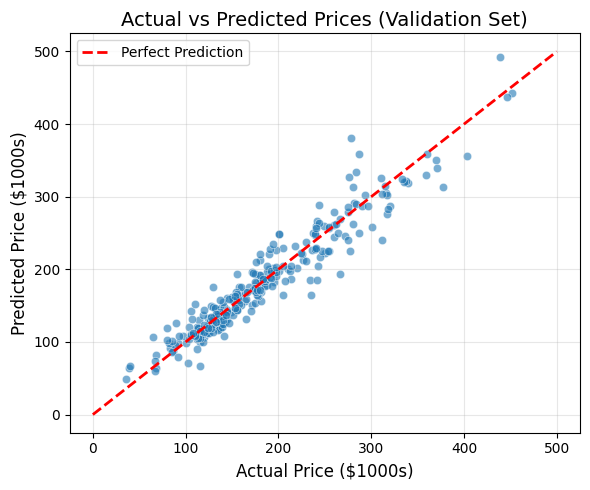

In [685]:
y_val_actual_dollars = np.expm1(y_val)
y_val_pred_dollars = np.expm1(y_val_pred_fe2)

plt.figure(figsize=(6, 5))

sns.scatterplot(x=y_val_actual_dollars/1000, y=y_val_pred_dollars/1000, alpha=0.6)

plt.plot([0, 500], [0, 500], 'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Price ($1000s)', fontsize=12)
plt.ylabel('Predicted Price ($1000s)', fontsize=12)
plt.title('Actual vs Predicted Prices (Validation Set)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show();